# Evaluation of Multi-Tier Framework for measuring access to electricity 

### Importing the useful libraries

In [1680]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math

### Importing the dataset

In [1681]:
df = pd.read_csv('Main_dataset.csv')

In [1682]:
df.head()

,Unnamed: 0,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B1,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,2.0,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.61765,Rural
1,1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.04202,Rural
2,2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.04202,Rural
3,3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.04202,Rural
4,4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.04202,Rural


### Downloading csv file from dta format

df.to_csv("Main_dataset.csv")

## Selecting the features(Columns) for analysis from the main dataset

To find out the power capacity, we need to know the different sources of power available. From our dataset:
    
1. C22: Power available from the national grid
2. C64: Power available from the mini grid
3. C88: Power available from the generator set
4. C117: Power available from the inverter
5. C119: Power available from the batteries
6. C151: Power available from solar panel (Not present in the dataset but is there in the survey)
7. C154: Power available from solar batteries (Not present in the dataset but is there in the survey)
8. Other source: Pico-Hyro (power capacity question not mentioned in the survey)

In [1683]:
df_analysis= df[['C22', 'C64','C88','C117','C119A']]

In [1684]:
df_analysis.head()

,C22,C64,C88,C117,C119A
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


## Renaming the columns

1. C22: National_Grid
2. C64: Mini_Grid
3. C88: Generator
4. C117: Inverter
5. C119A: Battery

In [1685]:
df_analysis.columns = ['National_Grid', 'Mini_Grid','Generator','Inverter','Battery']

In [1686]:
df_analysis.head()

,National_Grid,Mini_Grid,Generator,Inverter,Battery
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [1687]:
df_analysis.describe()

,National_Grid,Mini_Grid,Generator,Inverter,Battery
count,1478.000000,8.000000,1.0,1.0,4.000000
mean,20.231604,9.883625,12.0,220.0,20.000000
std,30.050734,5.797545,NaN,NaN,33.665016
min,2.000000,4.651000,12.0,220.0,0.000000
25%,4.650000,4.651000,12.0,220.0,0.000000
50%,9.300000,9.302000,12.0,220.0,5.000000
75%,23.260000,11.627750,12.0,220.0,25.000000
max,400.000000,18.605000,12.0,220.0,70.000000


# Analysing different Attributes


1. Capacity
2. Availability
3. Reliability
4. Quality
5. Affordability
6. Formality
7. Health and safety

## Attribute: Capacity (National_Grid)

1. Page 14 of MTF Energy Access Country Diagnostic report confirms that the average monthly household consumption of electricity is 20.8 kWh nationwide, 29.2 kWh in urban areas, and 9.9 kWh in rural areas. This means that the values recorded in the MTF survey for capacity are in kWh.

2. 26.8% of households households have been assessed as having basic access to electricity supply. The remaining 73.2% have no electricity source

In [1688]:
df_cap=df_analysis[['National_Grid']]

In [1689]:
df_cap.head(10)

,National_Grid
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,9.30
7,NaN
8,37.21
9,NaN


In [1690]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   National_Grid  1478 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


The power capacity units provided in the dataset are in monthly kWh. However, for TIER analysis the units are in daily Wh consumption. Therefore, dividing the dataset by 30 and multiplying it by 1000.

In [1691]:
df_cap["National_Grid"] = df_cap.National_Grid.apply(lambda x: x if math.isnan(x) else (x*1000)/30)

In [1692]:
df_cap.head(10)

,National_Grid
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,310.000000
7,NaN
8,1240.333333
9,NaN


In [1693]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   National_Grid  1478 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


### Visualizing the new dataset

In [1694]:
df_cap.describe()

,National_Grid
count,1478.000000
mean,674.386784
std,1001.691143
min,66.666667
25%,155.000000
50%,310.000000
75%,775.333333
max,13333.333333


## Checking for outliers in "National_Grid"

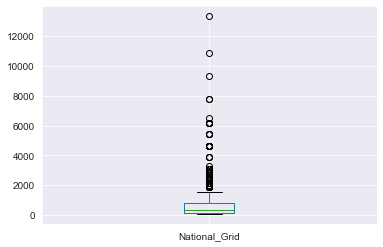

In [1695]:
df_cap.boxplot(column='National_Grid', return_type='axes')

### Checking the percentage of outliers

In [1696]:
#Outlier treatment for active and reactive power
Q1=df_cap.National_Grid.quantile(0.25)
Q3=df_cap.National_Grid.quantile(0.75)

#Calculating inter-quantile range
IQR=Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_cap["Outliers"] = df_cap.National_Grid.apply(lambda x: "NaN" if math.isnan(x) else ("True" if x > upper_bound or x < lower_bound else "False"))

In [1697]:
df_cap.tail()

,National_Grid,Outliers
3290,NaN,NaN
3291,155.000000,False
3292,201.666667,False
3293,155.000000,False
3294,NaN,NaN


In [1698]:
df_cap['Outliers'].value_counts()

NaN      1817
False    1370
True      108
Name: Outliers, dtype: int64

Text(0.5, 1.0, 'Percentage of outliers in "National_Grid"')

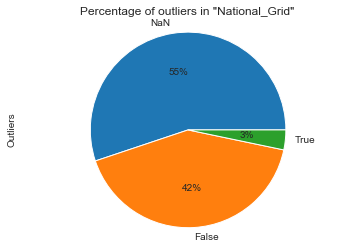

In [1699]:
df_cap.Outliers.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('Percentage of outliers in "National_Grid"')

From the above Pie chart we can see that there are 3% of outliers present in our dataset

### Removing the outliers

In [1700]:
df_cap_cleaned= df_cap[df_cap.Outliers != 'True']

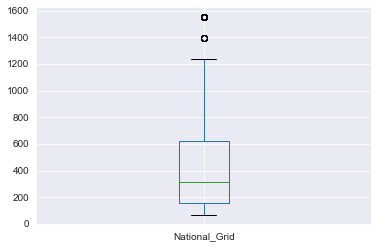

In [1701]:
df_cap_cleaned.boxplot(column='National_Grid', return_type='axes')

## Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [1702]:
df_cap_cleaned.drop('Outliers', axis=1, inplace=True)

In [1703]:
df_cap_cleaned["National_Grid"] = df_cap_cleaned.National_Grid.apply(lambda x: "Missing_data" if math.isnan(x) else x)

In [1704]:
df_cap_cleaned.head()

,National_Grid
0,Missing_data
1,Missing_data
2,Missing_data
3,Missing_data
4,Missing_data


In [1705]:
df_cap_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3187 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   National_Grid  3187 non-null   object
dtypes: object(1)
memory usage: 49.8+ KB


### Adding column "TIER" to the dataset with respect to household's power consumption

In [1706]:
def conditions(National_Grid):
    if National_Grid =='Missing_data':
        return "Missing_data"
    elif National_Grid<3:
        return "0"
    elif 3<=National_Grid<50:
        return "1"
    elif 50<=National_Grid<200:
        return "2"
    elif 200<=National_Grid<800:
        return "3"
    elif 800<=National_Grid<2000:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_cap_cleaned.National_Grid)
df_cap_cleaned["TIER"] = transform

In [1707]:
df_cap_cleaned.head()

,National_Grid,TIER
0,Missing_data,Missing_data
1,Missing_data,Missing_data
2,Missing_data,Missing_data
3,Missing_data,Missing_data
4,Missing_data,Missing_data


### Printing the TIER counts

In [1708]:
df_cap_cleaned['TIER'].value_counts()

Missing_data    1817
3                743
2                450
4                177
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on power capacity')

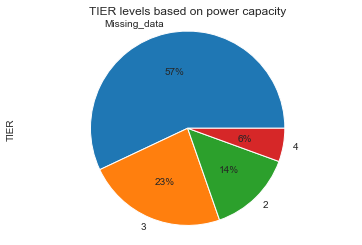

In [1710]:
df_cap_cleaned.TIER.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('TIER levels based on power capacity')

Page 22 of MTF Energy Access Country Diagnostic report confirms that almost all households in Tier 3 or above are connected to the grid (Maximum percentage of grid connected households lies in TIER 3). Most households in Tier 0 have no access to electricity.

## 2. Attribute: Availabilty (Day)

Methodology:

To understand the attribute more carefully, two columns have been taekn into consideration, C26A and C26B; 
* C26A represents the hours of electricity available each day and night from the grid in the worst months. 
* Whereas, C26B represents the hours of electricity available each day and nightfrom the grid in the actual months.

In [ ]:
df_av= df[['C26A','C26B']]

In [ ]:
df_av.tail()

In [ ]:
df_av.info()

## Calculation

In this step a new column "C26A_new" hasbeen formed. For this column, the values from column "C26A, worst months" has been taken as the main source of analysis and any missing information (missing value of a household) for this column has been taken from the column "C26B, actual months". This is done because the world bank group considers worst situation for analysis. 

In [ ]:
df_av['C26A_new'] = df_av.C26A.fillna(value=df_av.C26B)

In [ ]:
df_av.tail()

In [ ]:
df_av.info()

In [ ]:
df_av['C26A_new'].value_counts()

### Replacing NaN and "Don't know" values with "12345" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [ ]:
df_av["C26A_new"].fillna(12345, inplace = True) 

In [ ]:
df_av=df_av.replace(to_replace="Don't know",value=12345)

In [ ]:
df_av.tail()

In [ ]:
df_av.info()

### Converting coulmn C26A_new from Dtype: Object to Dtype: Float

In [ ]:
df_av["C26A_new"] = pd.to_numeric(df_av["C26A_new"])

In [ ]:
df_av.info()

### Adding column "AVAILABILITY" to the dataset with respect to household's daily consumption

In [ ]:
# AVAILABILITY: Day
#Note: conditions for TIER 1 and 2 are the same

def conditions(C26A_new):
    if C26A_new ==12345:
        return "Missing_data"
    elif C26A_new<4:
        return "0"
    elif 4<=C26A_new<8:
        return "1&2"
    elif 8<=C26A_new<16:
        return "3"
    elif 16<=C26A_new<23:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_av.C26A_new)
df_av["AVAILABILITY_DAY"] = transform

In [ ]:
df_av.tail()

In [ ]:
df_av['AVAILABILITY_DAY'].value_counts()

### Visualizing the TIER levels 

In [ ]:
df_av.AVAILABILITY_DAY.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('TIER levels based on electricity availability')

## 2. Attribute: Availabilty (Evening)

Methodology:

To understand the attribute more carefully, two columns have been taekn into consideration, C27A and C27B; 
* C27A represents the hours of electricity available each evening from the grid in the worst months. 
* Whereas, C27B represents the hours of electricity available each evening from the grid in the actual months.

In [ ]:
df_ave= df[['C27A','C27B']]

In [ ]:
df_ave.tail()

In [ ]:
df_ave.info()

## Calculation

In this step a new column "C27A_new" hasbeen formed. For this column, the values from column "C27A, worst months" has been taken as the main source of analysis and any missing information (missing value of a household) for this column has been taken from the column "C27B, actual months". This is done because the world bank group considers worst situation for analysis. 

In [ ]:
df_ave['C27A_new'] = df_ave.C27A.fillna(value=df_ave.C27B)

In [ ]:
df_ave.tail()

In [ ]:
df_ave.info()

In [ ]:
df_ave['C27A'].value_counts()

### Replacing NaN and "Don't know" values with "12345" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [ ]:
df_ave["C27A_new"].fillna(12345, inplace = True) 

In [ ]:
df_ave=df_ave.replace(to_replace="Don't know",value=12345)

In [ ]:
df_ave.tail()

In [ ]:
df_ave.info()

### Converting coulmn C27A_new from Dtype: Object to Dtype: Float

In [ ]:
df_ave["C27A_new"] = pd.to_numeric(df_ave["C27A_new"])

In [ ]:
df_ave.info()

### Adding column "AVAILABILITY" to the dataset with respect to household's evening consumption

In [ ]:
# AVAILABILITY: Evening
#Note: conditions for TIER 4 and 5 are the same


def conditions(C27A_new):
    if C27A_new ==12345:
        return "Missing_data"
    elif C27A_new<1:
        return "0"
    elif 1<=C27A_new<2:
        return "1"
    elif 2<=C27A_new<3:
        return "2"
    elif 3<=C27A_new<4:
        return "3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_ave.C27A_new)
df_ave["AVAILABILITY_EVENING"] = transform

In [ ]:
df_ave.tail()

In [ ]:
df_ave['AVAILABILITY_EVENING'].value_counts()

### Visualizing the TIER levels 

In [ ]:
df_ave.AVAILABILITY_EVENING.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('TIER levels based on electricity availability')

## 3. Attribute: Reliability

Methodology:

To understand the attribute more carefully, two columns have been taekn into consideration, C29A and C29B; 
* C29A represents the electricity disruption from the grid in the worst months. 
* Whereas, C29B represents the electricity disruption from the grid in the actual months.

In [ ]:
df_dis= df[['C29A','C29B']]

In [ ]:
df_dis.tail()

In [ ]:
df_dis.info()

## Calculation

In this step a new column "C29A_new" hasbeen formed. For this column, the values from column "C29A, worst months" has been taken as the main source of analysis and any missing information (missing value of a household) for this column has been taken from the column "C29B, actual months". This is done because the world bank group considers worst situation for analysis. 

In [ ]:
df_dis['C29A_new'] = df_dis.C29A.fillna(value=df_dis.C29B)

In [ ]:
df_dis.tail()

In [ ]:
df_dis.info()

In [ ]:
df_dis['C29A'].value_counts()

### Replacing NaN and "Don't know" values with "11111" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [ ]:
df_dis["C29A_new"].fillna(11111, inplace = True) 

In [ ]:
df_dis=df_dis.replace(to_replace="Don't know",value=11111)

In [ ]:
df_dis.tail()

In [ ]:
df_dis.info()

### Converting coulmn C27A_new from Dtype: Object to Dtype: Float

In [ ]:
df_dis["C29A_new"] = pd.to_numeric(df_dis["C29A_new"])

In [ ]:
df_dis.info()

Now this new column "C29A_new" depicts daily disruption from the grid. To calculate weekly disruption, this column has to be multiplied by 7.

In [ ]:
df_dis['C29A_new'] = df_dis['C29A_new'].apply(lambda x: x*7)

In [ ]:
df_dis.tail()

### Adding column "RELIABILITY" to the dataset with respect to electricity disruption

In [ ]:
# RELIABILITY
#Note: conditions for TIER 0,1 and 2 are the same and TIER 3 and 4 are the same


def conditions(C29A_new):
    if C29A_new ==77777:
        return "Missing_data"
    elif C29A_new>14:
        return "0,1&2"
    elif 3<C29A_new<14:
        return "3&4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_dis.C29A_new)
df_dis["RELIABILITY"] = transform

In [ ]:
df_dis.tail()

In [ ]:
df_dis['RELIABILITY'].value_counts()

### Visualizing the TIER levels 

In [ ]:
df_dis.RELIABILITY.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('TIER levels based on electricity reliabilty')

## 4. Attribute: Quality

For this attribute column C39 has been selected as it describes if in the last 12 months, any of the appliances got damaged because the voltage was going up and down from the grid.

In [ ]:
df_q= df[['C39']]

In [ ]:
df_q.tail()

In [ ]:
df_q.info()

In [ ]:
df_q['C39'].value_counts()

### Making a new column and replacing NaN and "Don't know" values with "11111" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [ ]:
df_q['C39_new'] = df_q.C39.fillna(value=df_q.C39)

In [ ]:
df_q["C39_new"].fillna(11111, inplace = True) 

In [ ]:
df_q=df_q.replace(to_replace="Don?t know",value=11111)

In [ ]:
df_q.head()

In [ ]:
df_q.info()

In [ ]:
df_q['C39_new'].value_counts()

### Adding column "QUALITY" to the dataset 

In [ ]:
# RELIABILITY
#Note: conditions for TIER 0,1,2 and 3 are the same and TIER 4 and 5 are the same


def conditions(C39_new):
    if C39_new ==11111:
        return "Missing_data"
    elif C39_new=="Yes":
        return "0,1,2&3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_q.C39_new)
df_q["QUALITY"] = transform

In [ ]:
df_q.tail()

In [ ]:
df_q['QUALITY'].value_counts()

### Visualizing the TIER levels 

In [ ]:
df_q.QUALITY.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('TIER levels based on electricity quality')